In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
!pip install wordcloud


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Ensure NLTK dependencies are downloaded (if not already)
nltk.download('vader_lexicon')  # For SentimentIntensityAnalyzer
nltk.download('stopwords')     # For stopwords


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
true_news_df = pd.read_csv(r"C:\Users\kshit\OneDrive\Desktop\Project Dataset\True.csv\True.csv")
fake_news_df = pd.read_csv(r"C:\Users\kshit\OneDrive\Desktop\Project Dataset\Fake.csv\Fake.csv")

In [15]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [17]:
true_news_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [19]:
true_news_df.duplicated().sum()

206

In [21]:
true_news_df.drop_duplicates(inplace=True)

In [23]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [25]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [27]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [29]:
fake_news_df.duplicated().sum()

3

In [31]:
fake_news_df.drop_duplicates(inplace=True)

In [33]:
# Step 4: Combine the datasets
true_news_df['label'] = 'true'
fake_news_df['label'] = 'fake'

In [35]:
combined_df = pd.concat([true_news_df, fake_news_df], ignore_index=True)

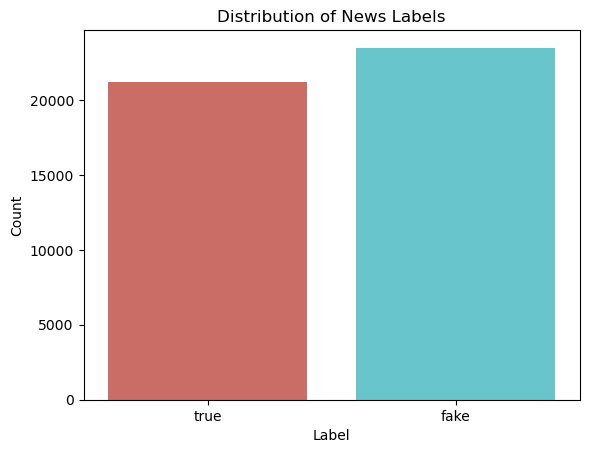

In [37]:
import seaborn as sns

def create_distribution(dataFile):
    return sns.countplot(x='label', data=dataFile, palette='hls')

create_distribution(combined_df)
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [41]:
import nltk

# Download the required NLTK resources
nltk.download('punkt')  # General tokenization resources
nltk.download('punkt_tab')  # Additional tokenizer resources (if available)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [43]:
import nltk
print(nltk.data.path)


['C:\\Users\\kshit/nltk_data', 'F:\\Anaconda\\nltk_data', 'F:\\Anaconda\\share\\nltk_data', 'F:\\Anaconda\\lib\\nltk_data', 'C:\\Users\\kshit\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [45]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Tokenization
combined_df['text'] = combined_df['text'].apply(word_tokenize)

# Stopword removal and normalization
stop_words = set(stopwords.words('english'))
combined_df['text'] = combined_df['text'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stop_words])

# Counting word frequency
word_freq = Counter()
combined_df['text'].apply(word_freq.update)

0        None
1        None
2        None
3        None
4        None
         ... 
44684    None
44685    None
44686    None
44687    None
44688    None
Name: text, Length: 44689, dtype: object

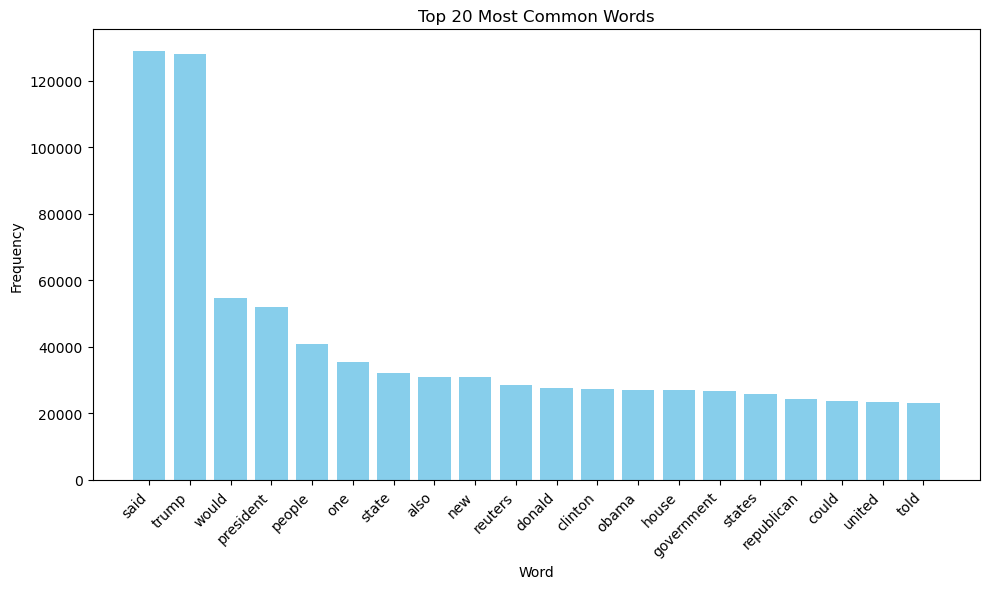

In [47]:
# Visualizing word frequency
plt.figure(figsize=(10, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


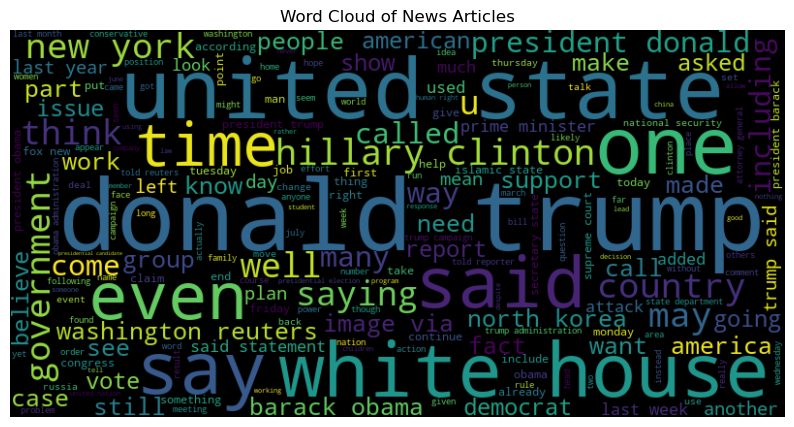

In [49]:
from wordcloud import WordCloud

# Combine the text from all news articles
all_text = ' '.join(' '.join(text) for text in combined_df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of News Articles')
plt.axis('off')
plt.show()


In [51]:
import pandas as pd

combined_df['date'] = pd.to_datetime(combined_df['date'], dayfirst=True, errors='coerce')

combined_df['Year'] = combined_df['date'].dt.year
combined_df['Month'] = combined_df['date'].dt.month_name()


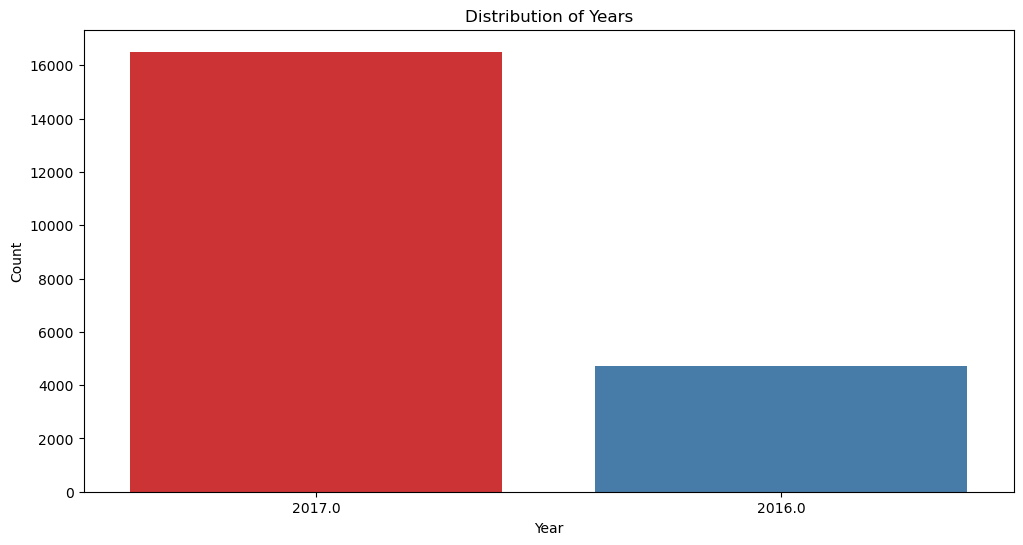

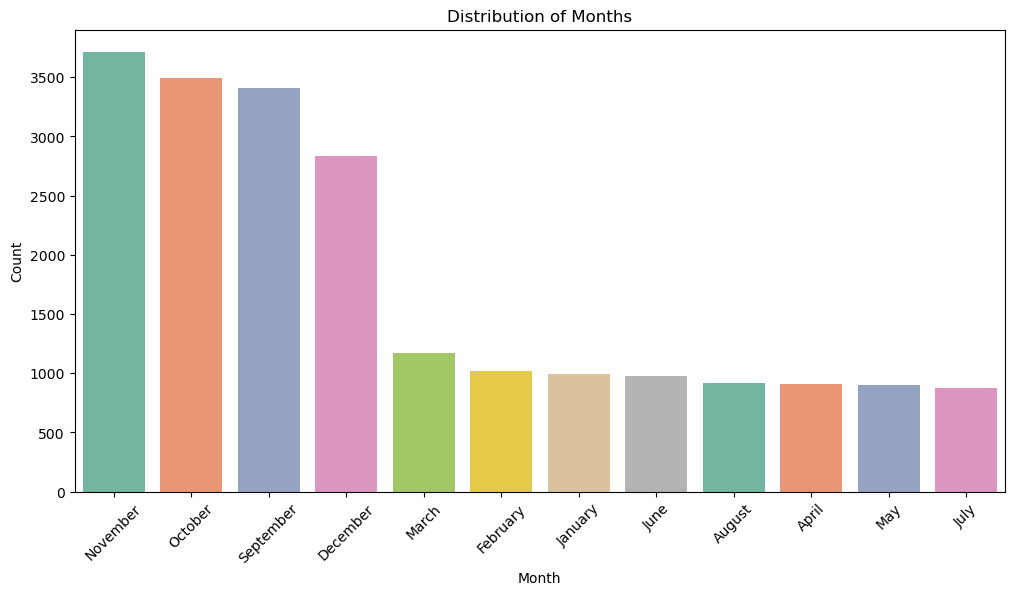

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Distribution of Years
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=combined_df, order=combined_df['Year'].value_counts().index, palette='Set1')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Distribution of Months
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=combined_df, order=pd.DataFrame(combined_df['Month'].value_counts()).index, palette='Set2')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [55]:
print(combined_df.columns)


Index(['title', 'text', 'subject', 'date', 'label', 'Year', 'Month'], dtype='object')


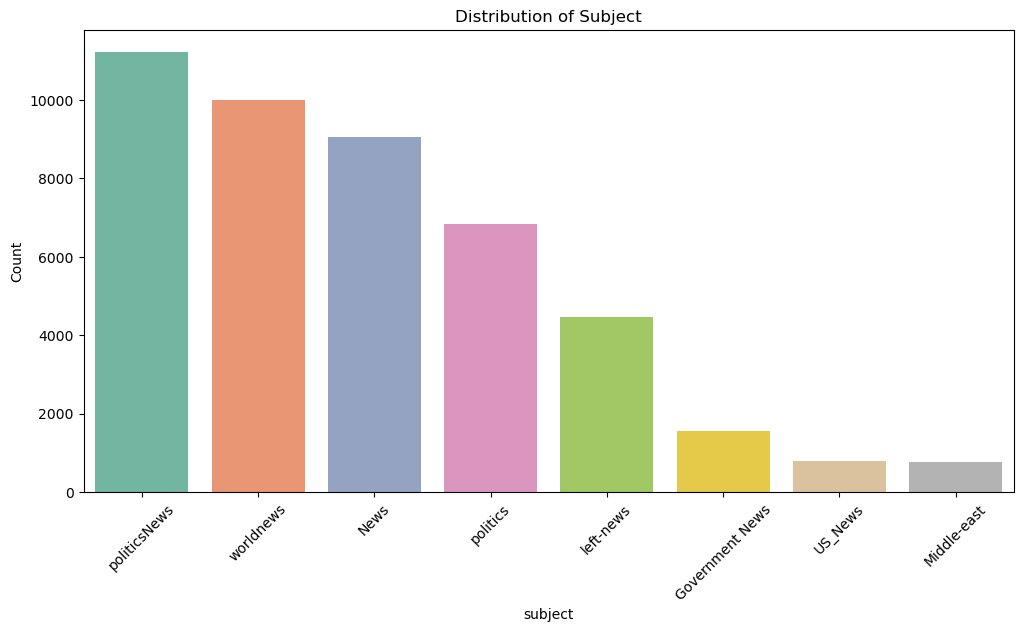

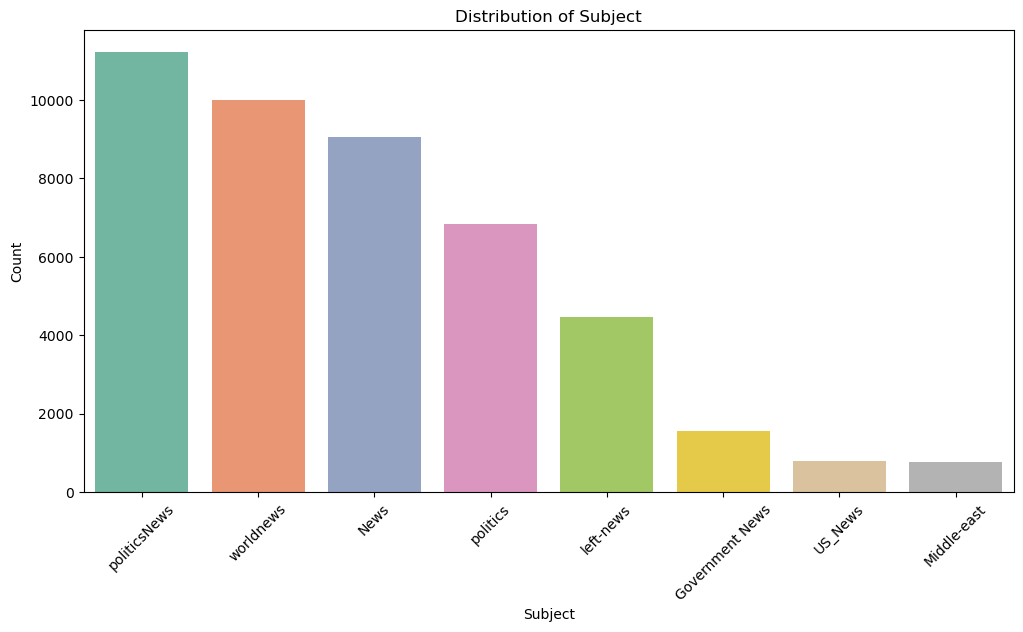

In [57]:

# Distribution of Subject
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df, order=combined_df['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis - Relationship between Label and Subject
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df, order=combined_df['subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


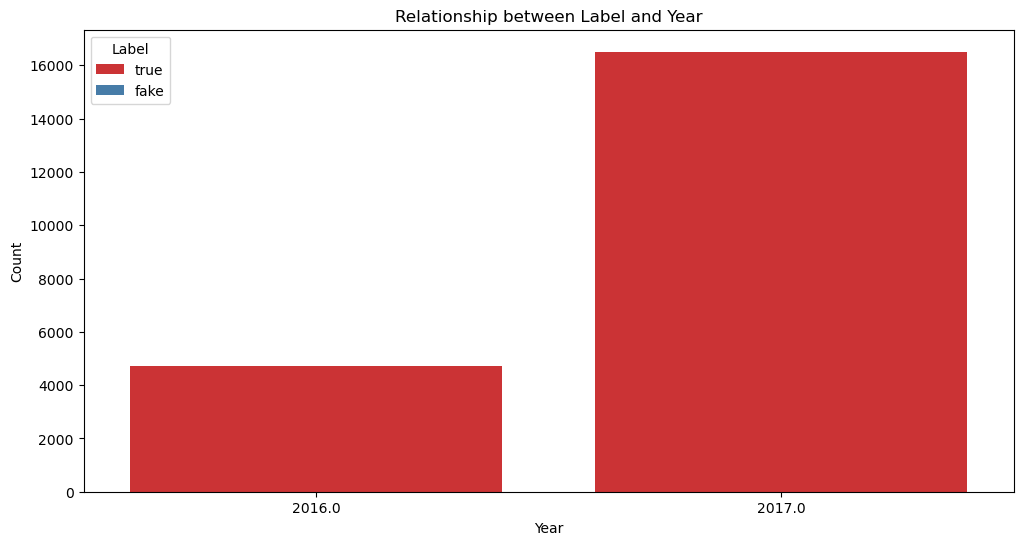

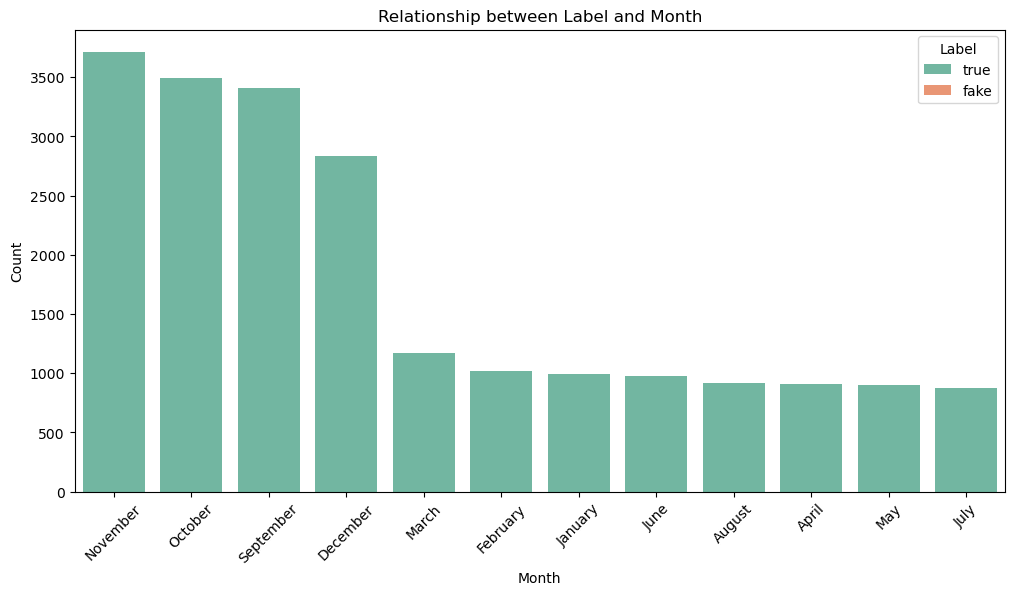

In [59]:

# Bivariate Analysis - Relationship between Label and Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='label', data=combined_df, palette='Set1')
plt.title('Relationship between Label and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()

# Bivariate Analysis - Relationship between Label and Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='label', data=combined_df, palette='Set2', order=pd.DataFrame(combined_df['Month'].value_counts()).index)
plt.title('Relationship between Label and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()


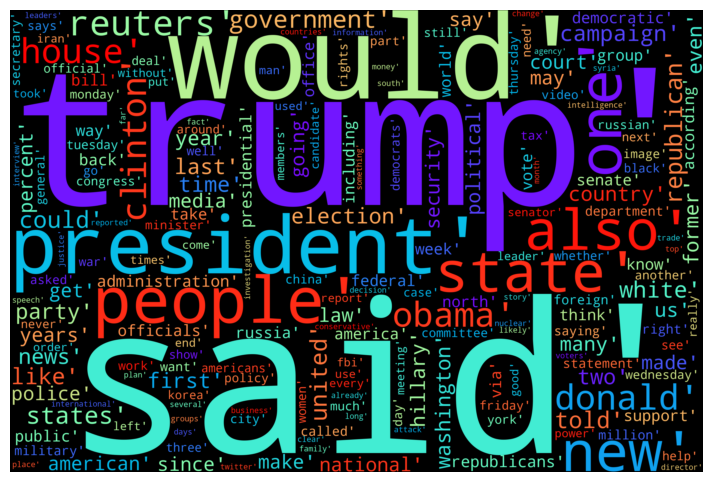

In [61]:
# Bigrams Text - Word Cloud
text = " ".join(combined_df['text'].astype(str))
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

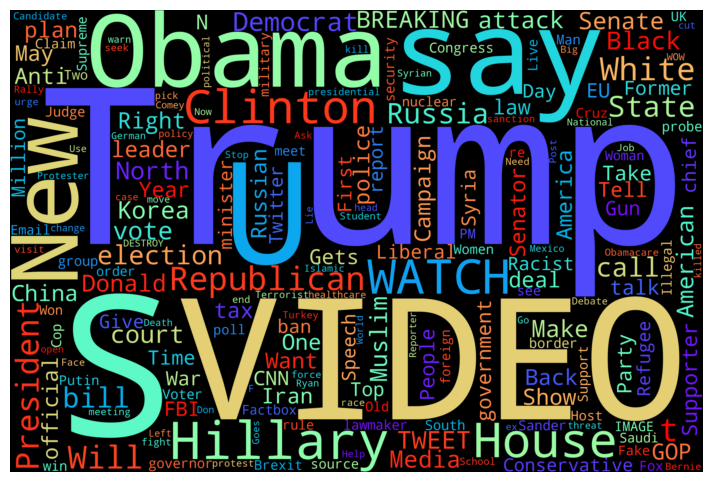

In [63]:
text = " ".join(combined_df['title'].astype(str))


wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [65]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [67]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text
combined_df['sentiment'] = combined_df['text'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

# Display a few rows with sentiment scores
print(combined_df[['text', 'sentiment']].head())

                                                text  sentiment
0  [washington, reuters, head, conservative, repu...     0.9855
1  [washington, reuters, transgender, people, all...     0.9578
2  [washington, reuters, special, counsel, invest...     0.3400
3  [washington, reuters, trump, campaign, adviser...    -0.1761
4  [reuters, president, donald, trump, called, po...     0.9702


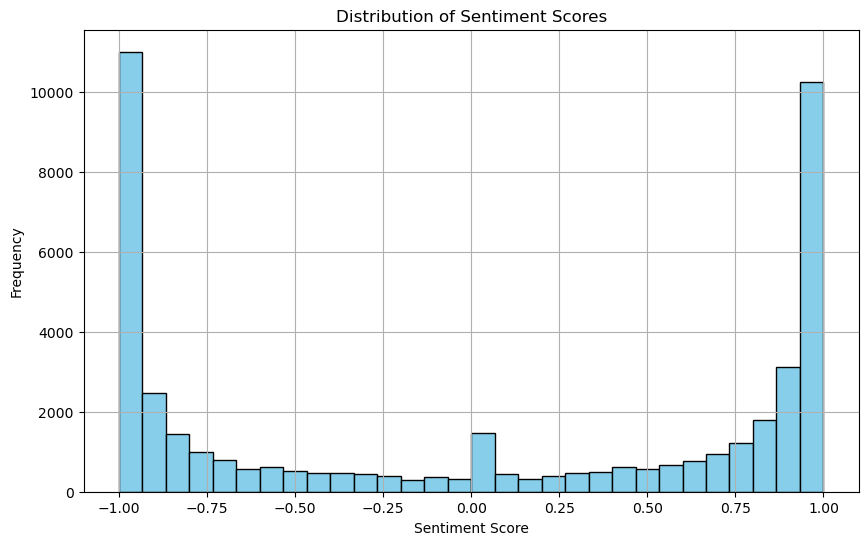

In [69]:
import matplotlib.pyplot as plt

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(combined_df['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


sentiment_category
positive    22197
negative    20958
neutral      1534
Name: count, dtype: int64


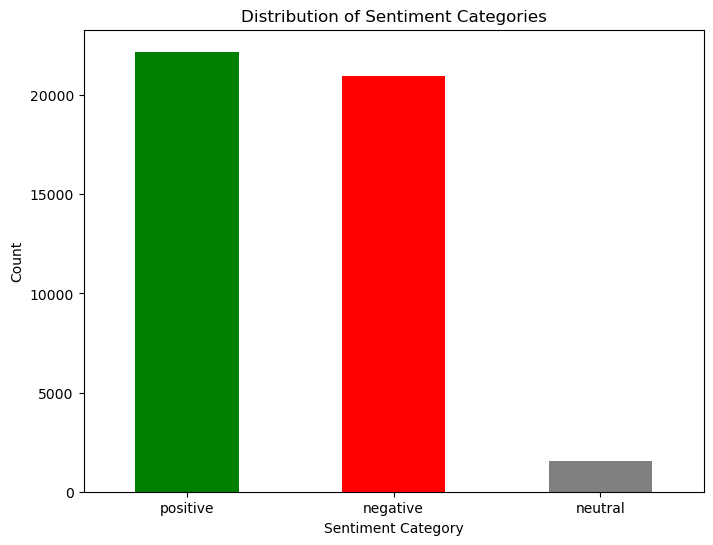

In [71]:
# Define thresholds for sentiment categories
positive_threshold = 0.05
negative_threshold = -0.05

# Categorize sentiment scores into positive, negative, and neutral
combined_df['sentiment_category'] = combined_df['sentiment'].apply(lambda x: 'positive' if x > positive_threshold else ('negative' if x < negative_threshold else 'neutral'))

# Display the count of each sentiment category
print(combined_df['sentiment_category'].value_counts())

# Plotting the distribution of sentiment categories
plt.figure(figsize=(8, 6))
combined_df['sentiment_category'].value_counts().plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming combined_data is the DataFrame containing your data
X = combined_df['text']
y = combined_df['label']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Preprocessing the text data using CountVectorizer
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)


In [75]:
# Flatten the list of lists into a single list
X_train_flat = [' '.join(sublist) for sublist in X_train]
X_test_flat = [' '.join(sublist) for sublist in X_test]


In [77]:
# Preprocessing the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_flat)
X_test_vectorized = vectorizer.transform(X_test_flat)


In [78]:
# Training the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

# Predicting on the testing data
y_pred = naive_bayes.predict(X_test_vectorized)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9486089356306407
Confusion Matrix:
[[6624  335]
 [ 354 6094]]
Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.95      0.95      6959
        true       0.95      0.95      0.95      6448

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407

